$S_t = \rho  Y_t + (1 - \rho) S_{t-1}$

$S_t$ : 현재 지수 이동 평균

$S_{t-1}$ : 과거 지수 이동 평균

$Y_t$ : 현재 시점 데이터

 $\rho$ : smoothing factor 또는 decay factor

In [7]:
# !pip install tensorflow-addons  

In [8]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
import numpy as np
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
max_features = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
max_len = 200 

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
def model_by_opti(opti):
    good_bad_model = Sequential()
    good_bad_model.add(Embedding(max_features, 64, input_length=max_len))
    good_bad_model.add(Flatten())
    good_bad_model.add(Dense(32, activation = 'relu'))
    good_bad_model.add(Dense(1, activation = 'sigmoid'))
    good_bad_model.compile(optimizer=opti,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    good_bad_model.fit(x_train,y_train,
                       epochs=50,
                       batch_size= 2048,
                       validation_split = 0.2,
                       verbose = 0)
    
    return good_bad_model

In [9]:
import tensorflow as tf
import tensorflow_addons as tfa

optis = {}

sgd_op = SGD()
adg_op = Adagrad()
rms_op = RMSprop()
adam_op = Adam()
adb_op = tfa.optimizers.AdaBelief()
optis['SGD'] = sgd_op
optis['Adagrad'] = adg_op
optis['RMSprop'] = rms_op
optis['Adam'] = adam_op
optis['AdaBelief'] = adb_op

In [10]:
models = {}

for op in optis:
    models[op] = model_by_opti(optis[op])

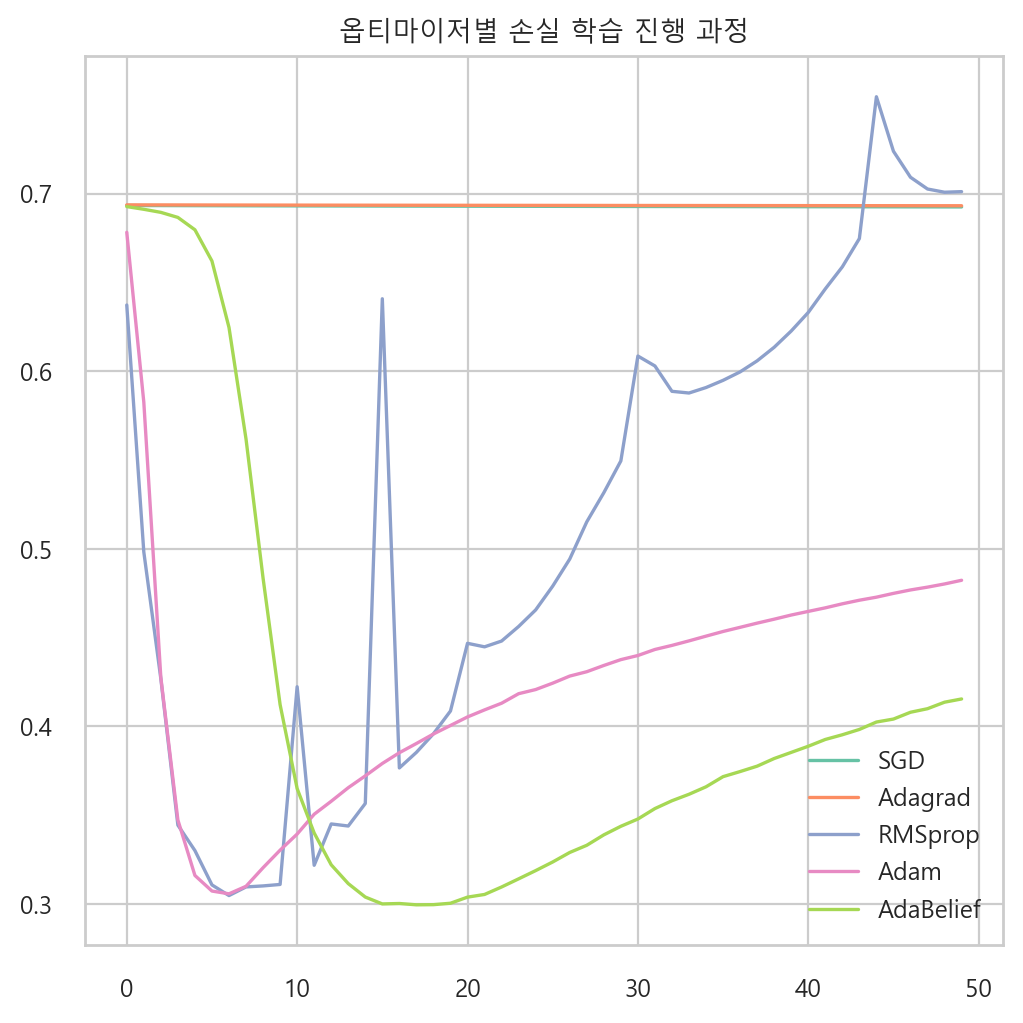

In [11]:
fig, ax = plt.subplots(figsize=(5,5))


for model in models:
    sns.lineplot(models[model].history.history['val_loss'],label=model, ax=ax)

ax.set_title("옵티마이저별 손실 학습 진행 과정");